# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (27)

**08/05/2023**

## Aplicar un caso de uso (*Time Series Forecasting*)

In [2]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

En esta sesión intentaremos predecir las **ventas mensuales de corticosteroides en Australia**. Estos medicamentos se conocen como **fármacos H02** según el esquema de clasificación Anatómico Terapéutico Químico (_ATC_)y se utilizan principalmente por sus efectos **antiinflamatorios** e inmunosupresores. Por ejemplo __Dexametasona__ y __Betametasona__ son algunos ejemplos de medicamentos de la clase H02.

Dascargamos la serie temporal con las ventas mensuales en **millones de dólares** en fármacos **H02** que se han recetado en el **sistema de salud Australiano** entre los años de **1991 y 2008**.

In [4]:
df = pd.read_csv('dataset_h02.csv')
df

,fecha,venta_h02
0,1992-04-01,0.379808
1,1992-05-01,0.361801
2,1992-06-01,0.410534
3,1992-07-01,0.483389
4,1992-08-01,0.475463
...,...,...
190,2008-02-01,0.761822
191,2008-03-01,0.649435
192,2008-04-01,0.827887
193,2008-05-01,0.816255


In [5]:
# Definir un rango de fechas con pasos fijos
fechas = pd.date_range(start=df['fecha'].values[0], end=df['fecha'].values[-1], freq='MS')

# Asignar a las fechas como los índices del DataFrame
df.set_index(fechas, inplace=True)

# Quitar la columna 'fecha' de la tabla
df.drop(columns='fecha', inplace=True)

df

,venta_h02
1992-04-01,0.379808
1992-05-01,0.361801
1992-06-01,0.410534
1992-07-01,0.483389
1992-08-01,0.475463
...,...
2008-02-01,0.761822
2008-03-01,0.649435
2008-04-01,0.827887
2008-05-01,0.816255


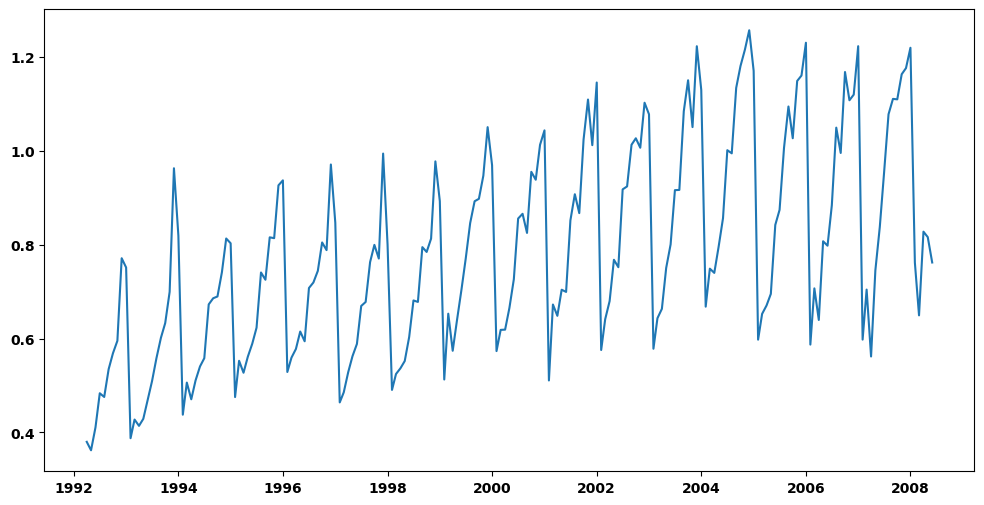

In [6]:
# Visualizamos los datos preparados
plt.plot(df)
plt.show()

In [7]:
# Las gráficas interactivas ayudan bastante a los analistas de datos, sobre todo a la hora de analizar y explorar las series temporales
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.index,
    y=df['venta_h02'],
    mode="markers+lines"
    ))

fig.update_layout(title="Ventas mensuales de corticosteroides (H02) en Australia",
                  title_font_size=26,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Millones de dólares (A$)'
                  )

fig.show()

---

### **`Ejercicio 27.1`**

**`27.1.1`** Aplica una descomposición de la serie temporal mediante el método `seasonal_decompose` y visualiza los componentes correspondientes. Describe la tendencia y la estacionalidad si son presentes en la serie temporal.

**`27.1.2`** Saca la gráfica de ***correlograma*** para la serie temporal, considerando hasta el retraso indicado y analiza los patrones que ves presente en esta gráfica: 

 - `lags=60`

**`24.1.3`** Saca la gráfica de ***Autocorrelación parcial*** para la serie temporal, considerando el método con los retrasos indicados y analiza los patrones que ves presente en esta gráfica: 

 - `lags=48`
 - `method='ywm'`

**`27.1.4`** Saca la gráfica de las ***Características estadísticas*** y su evolución a lo largo de tiempo de **la serie temporal**, considerando una ventana con el tamaño indicado. Analiza y explica esta evolución de la media y de la varianza de los datos: 

 - `win = 12`

---

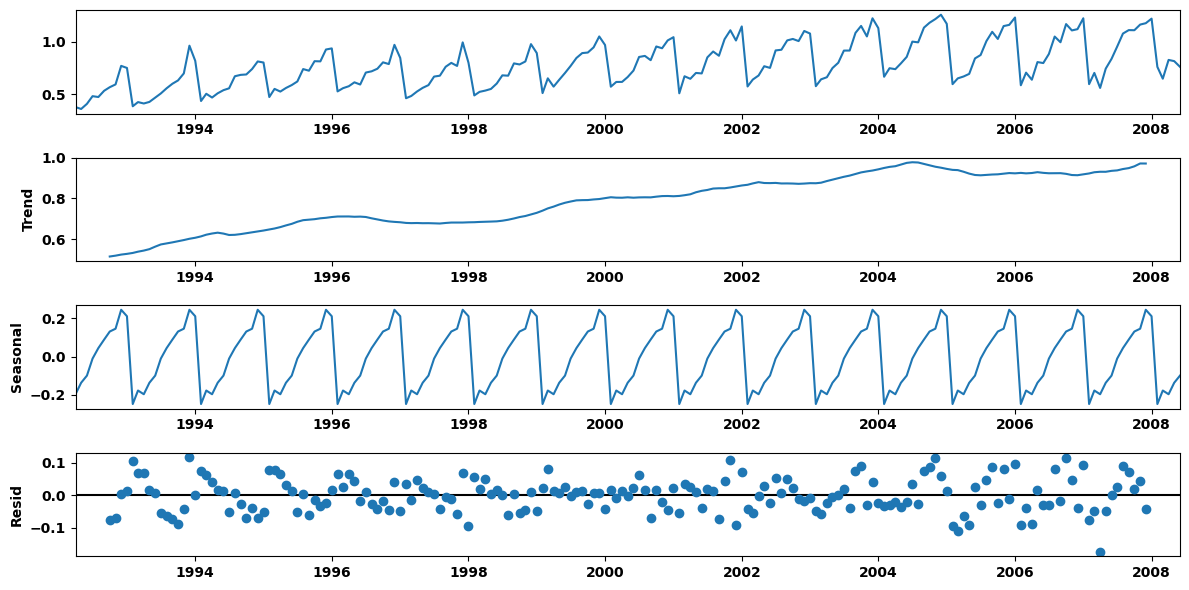

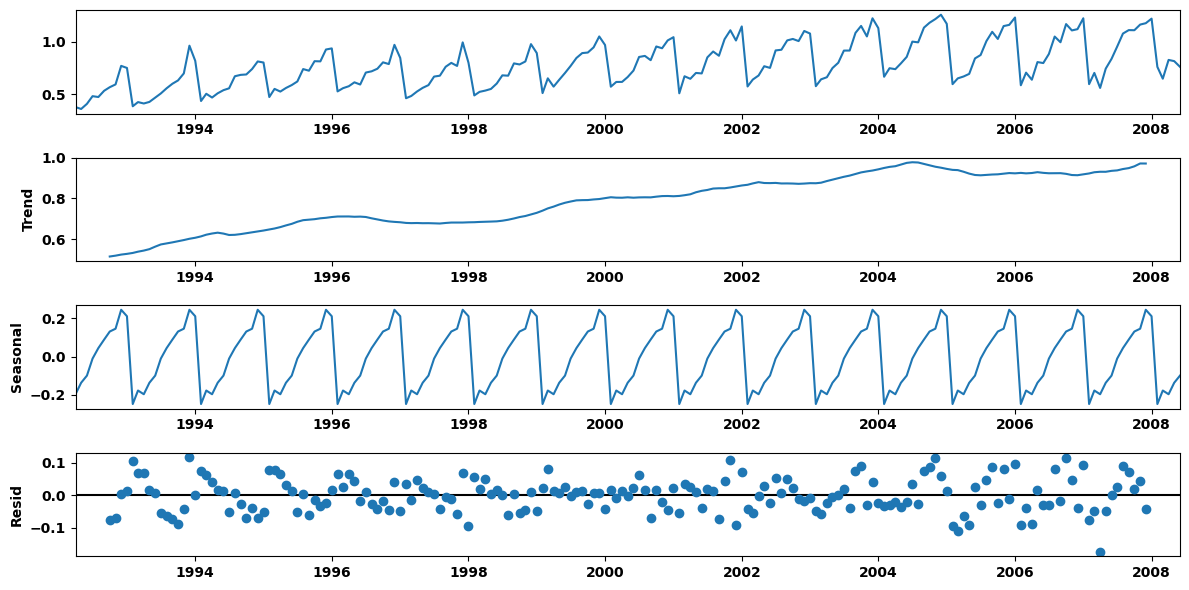

In [8]:
#27.1.1

from statsmodels.tsa.seasonal import seasonal_decompose

df_chemestry = seasonal_decompose(df, model='additive')

df_chemestry.plot()
## Las tres seasonal siguen la misma tendencia, no hay nada que varie. La estacionalidad esta presente en la tendencia


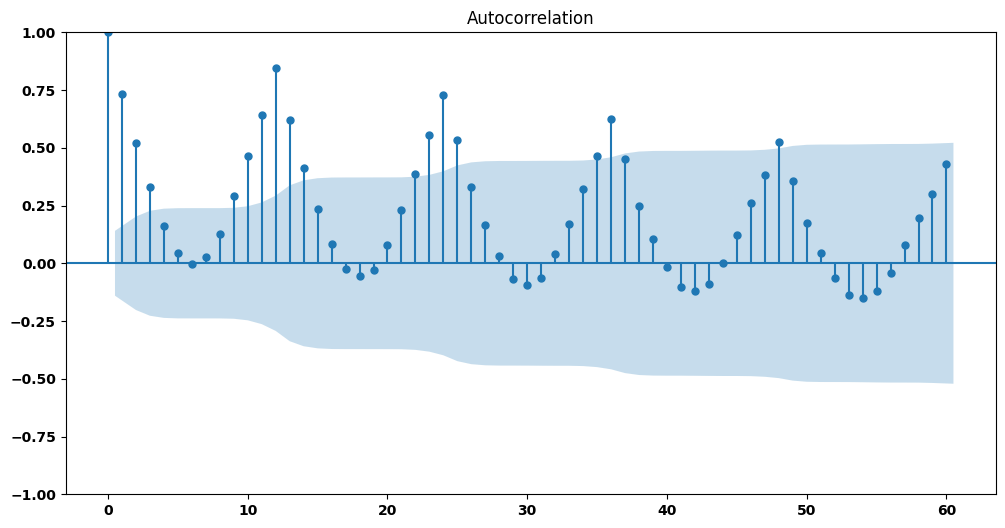

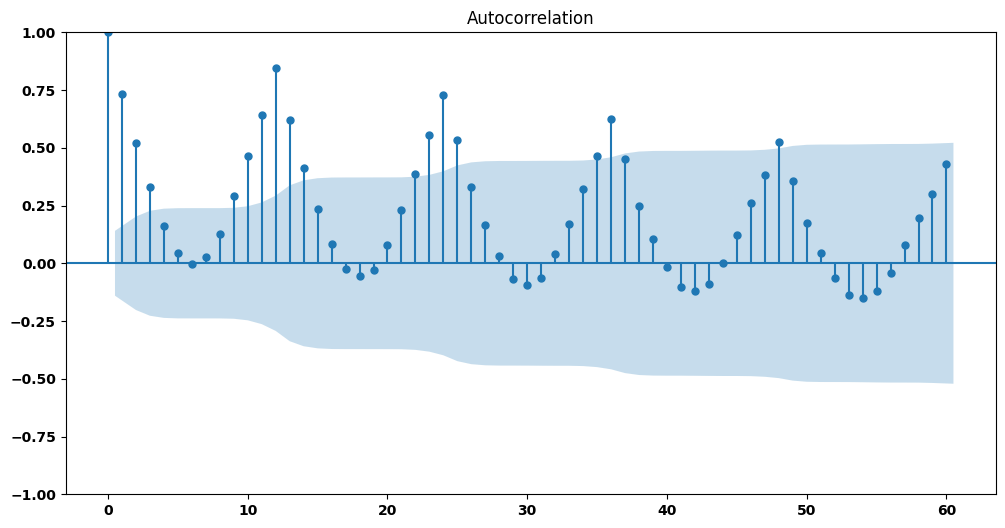

In [9]:
#27.1.2
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df, lags=60)
#En la grafica de la correlacion sigue la misma tendencia

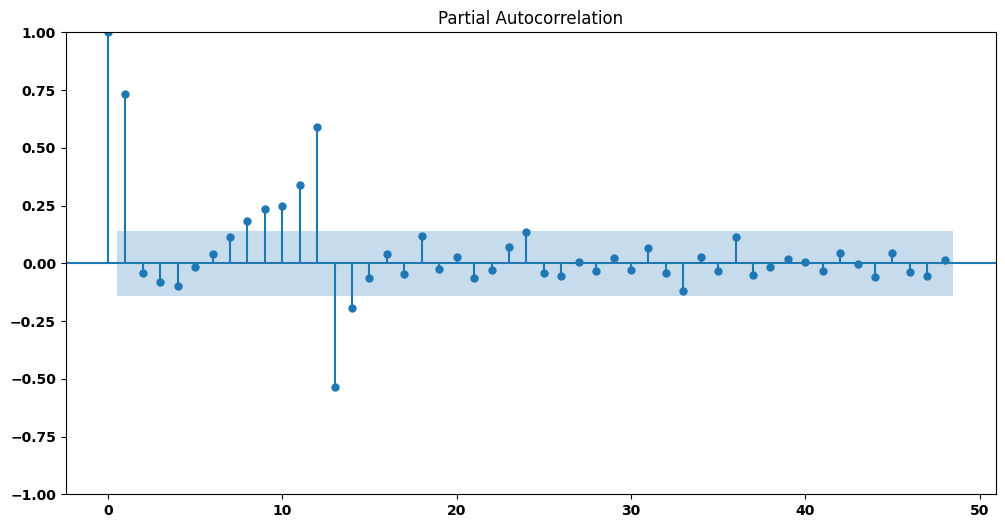

In [10]:
#27.1.3
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df, lags=48, method='ywm')

plt.show()

# Casi todos los datos estan correlacionados excepto el 0,1 y el 11,12 

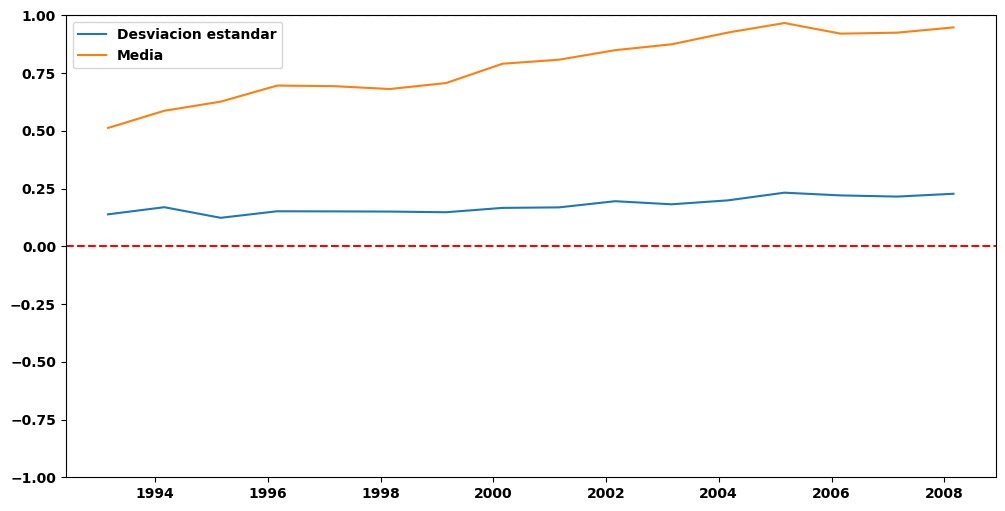

In [11]:
#27.1.4

win = 12
ruido3_std = df.rolling(win).std().iloc[win-1::win]
ruido3_mean = df.rolling(win).mean().iloc[win-1::win]
plt.plot(ruido3_std, label='Desviacion estandar')
plt.plot(ruido3_mean, label='Media')
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=1, color='r', linestyle='--')
plt.legend()
plt.ylim(-1,1)
plt.show()

## Conforme sube la desviacion estandar tambien sube la media

### **`Ejercicio 27.2`**

Vamos a intentar a modelar la serie temporal con el objetivo de **predecir los valores mensuales del último año**. 

**`27.2.1`** Aplica el método de `Seasonal Naïve` a la serie temporal y consigue estos puntos **y analiza los resultados obtenidos**:
- Grafica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

**`27.2.2`** Aplica el método estadístico de `Autoregresión - AR` considerando el valor del parámetro _`p`_ según el último retraso con un valor significativo en la ***correlograma*** de la serie temporal. Después consigue estos puntos **y analiza los resultados obtenidos**:
- Resumen del modelo ajustado (_Model fit summary_) 
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_"
- Gráficas de análisis del componente residual (curvas de diagnóstico, correlaciones con otras variables)
- Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Gráfica interactiva con el histórico, la predicción de este modelo con **sus intervalos de confianza** y los valores reales del último año. 
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

**`27.2.3`** Aplica el modelo de `SARIMA` para la serie temporal, utilizando el método de **`auto_arima`** según la búsqueda indicada considerando la estacionalidad de la serie. Después consigue estos puntos **y analiza los resultados obtenidos**:
- `start_p=1`
- `start_q=0`
- `start_P=1`
- Resumen del modelo ajustado (_Model fit summary_) 
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_"
- Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.


---

In [12]:
#Ejercicio 27.2.1
# Definir el periodo de prueba (horizonte de predicción)
horizonte = 12  # La cantidad de puntos a predecir
df_test = df.tail(horizonte)
df_test

,venta_h02
2007-07-01,0.954144
2007-08-01,1.078219
2007-09-01,1.110982
2007-10-01,1.109979
2007-11-01,1.163534
2007-12-01,1.176589
2008-01-01,1.219941
2008-02-01,0.761822
2008-03-01,0.649435
2008-04-01,0.827887


In [13]:
df_train = df[df.index.isin(df_test.index)==False]
df_train

,venta_h02
1992-04-01,0.379808
1992-05-01,0.361801
1992-06-01,0.410534
1992-07-01,0.483389
1992-08-01,0.475463
...,...
2007-02-01,0.597753
2007-03-01,0.704398
2007-04-01,0.561760
2007-05-01,0.745258


In [14]:
pred_sn = pd.DataFrame(data=df_train.tail(12).values, index=df_test.index, columns=['pred'])
pred_sn

,pred
2007-07-01,0.884312
2007-08-01,1.049648
2007-09-01,0.995709
2007-10-01,1.168253
2007-11-01,1.108038
2007-12-01,1.120053
2008-01-01,1.223319
2008-02-01,0.597753
2008-03-01,0.704398
2008-04-01,0.561760


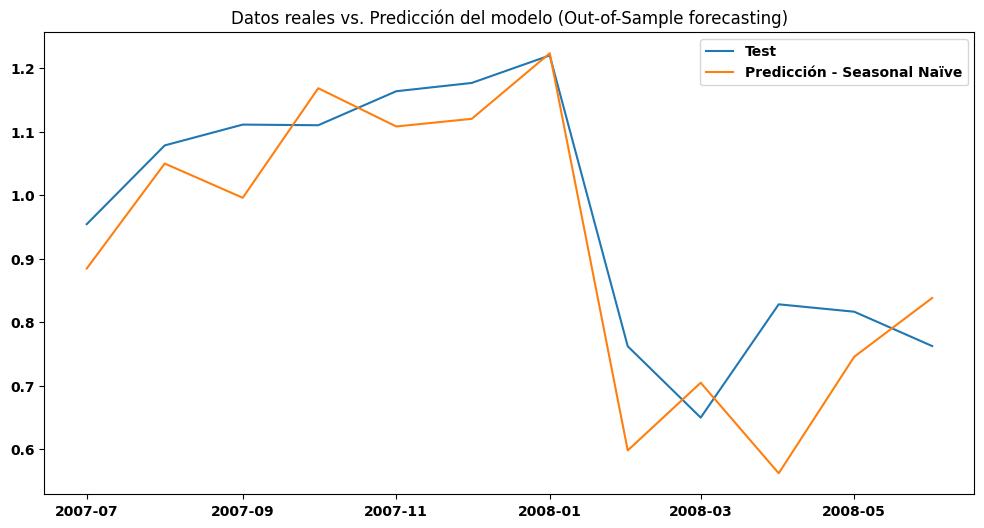

In [15]:
#Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)
plt.plot(df_test, label='Test')
plt.plot(pred_sn, label='Predicción - Seasonal Naïve')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()
## La prediccion conseguida se acerca bastante a los datos reales

In [16]:
# Métricas de evaluación del modelo
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Out-of-sample performance:  Seasonal Naive")
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_sn))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_test, pred_sn)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_sn))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_sn)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_sn))

## Esta bastante bien conseguido pero aun queda mucho para que sea bueno

Out-of-sample performance:  Seasonal Naive
Mean Absolute Error (MAE): 0.08494277166666668
Mean Absolute Percentage Error: 9.686181826381263
Mean Squared Error (MSE): 0.011684411050918485
Root Mean Squared Error (RMSE): 0.10809445430232989
R^2 coefficient of determination: 0.6717644471769628


In [17]:
#27.2.2
from statsmodels.tsa.ar_model import AutoReg

modelo_ar = AutoReg(df_train, lags=12)
modelo_ar

# Ajustar el modelo a los datos de entrenamiento
fit_ar = modelo_ar.fit()
fit_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              venta_h02   No. Observations:                  183
Model:                    AutoReg(12)   Log Likelihood                 238.296
Method:               Conditional MLE   S.D. of innovations              0.060
Date:                Sat, 13 May 2023   AIC                           -448.593
Time:                        09:42:45   BIC                           -404.609
Sample:                    04-01-1993   HQIC                          -430.746
                         - 06-01-2007                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1155      0.029      4.046      0.000       0.060       0.171
venta_h02.L1      0.0534      0.039      1.362      0.173      -0.023       0.130
venta_h02.L2      0.0367      0.039      0.949      0.343      -0.039       0.112
venta_h02.L3     -0.0265      0.039     -0.686      0.493      -0.102       0.049
venta_h02.L4     -0.0414      0.039     -1.070      0.285      -0.117       0.034
venta_h02.L5      0.0132      0.040      0.333      0.739      -0.065       0.091
venta_h02.L6     -0.0389      0.041     -0.952      0.341      -0.119       0.041
venta_h02.L7     -0.0064      0.041     -0.156      0.876      -0.086       0.074
venta_h02.L8     -0.0123      0.041     -0.301      0.764      -0.092       0.068
venta_h02.L9      0.0106      0.041      0.259      0.796      -0.070       0.091
venta_h02.L10    -0.0151      0.041     -0.368      0.713      -0.096       0.065
venta_h02.L11     0.0280      0.041      0.679      0.497      -0.053       0.109
venta_h02.L12     0.8842      0.040     21.911      0.000       0.805       0.963
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0104           -0.0000j            1.0104           -0.0000
AR.2             0.8643           -0.4984j            0.9977           -0.0833
AR.3             0.8643           +0.4984j            0.9977            0.0833
AR.4             0.5092           -0.8691j            1.0073           -0.1657
AR.5             0.5092           +0.8691j            1.0073            0.1657
AR.6             0.0067           -1.0135j            1.0135           -0.2490
AR.7             0.0067           +1.0135j            1.0135            0.2490
AR.8            -0.5138           -0.8780j            1.0173           -0.3343
AR.9            -0.5138           +0.8780j            1.0173            0.3343
AR.10           -1.0235           -0.0000j            1.0235           -0.5000
AR.11           -0.8756           -0.5018j            1.0092           -0.4172
AR.12           -0.8756           +0.5018j            1.0092            0.4172
------------------------------------------------------------------------------
"""

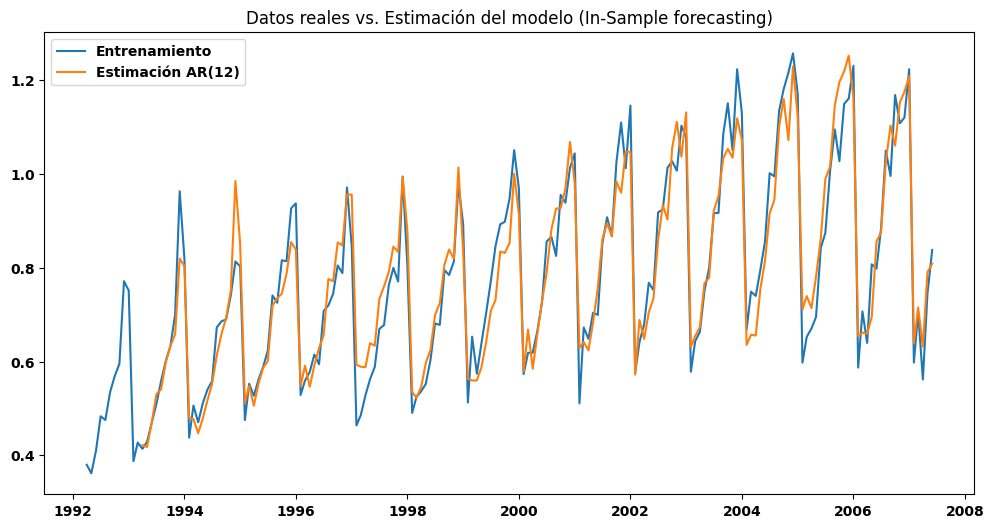

In [18]:
estim_ar = fit_ar.fittedvalues



plt.plot(df_train, label='Entrenamiento')
plt.plot(estim_ar, label='Estimación AR(12)')
plt.title("Datos reales vs. Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

## El modelo de estimacion AR es casi perfecto. sigue la tendencia a la perfeccion

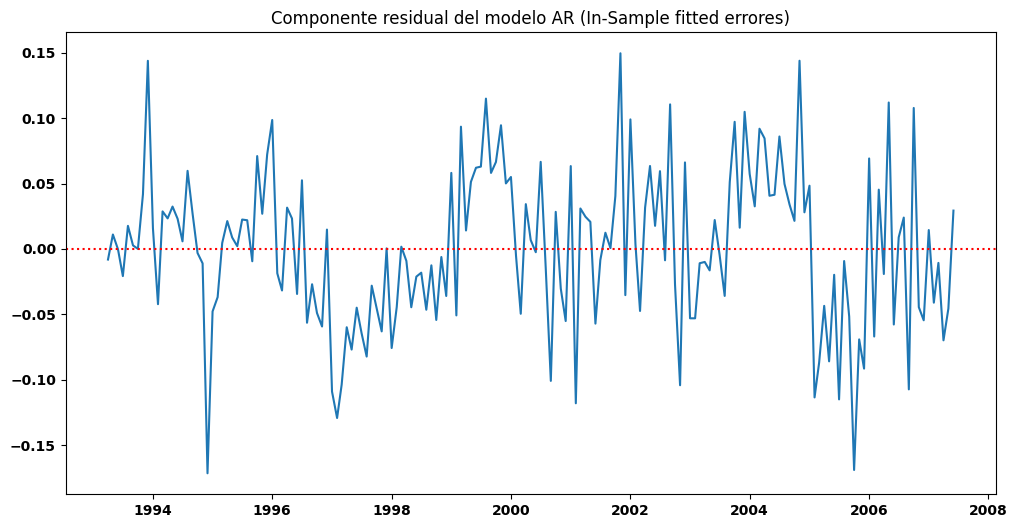

In [19]:
#Gráficas de análisis del componente residual (curvas de diagnóstico, correlaciones con otras variables)
# Se pueden extraer directamente desde el modelo entrenado mediante el atributo "resid"

resid_ar = fit_ar.resid
plt.plot(resid_ar)
plt.title("Componente residual del modelo AR (In-Sample fitted errores)")
plt.axhline(y=0, color='r', linestyle=':')
plt.show()
### Se puede apreciar que el comonente residual es bastante bueno

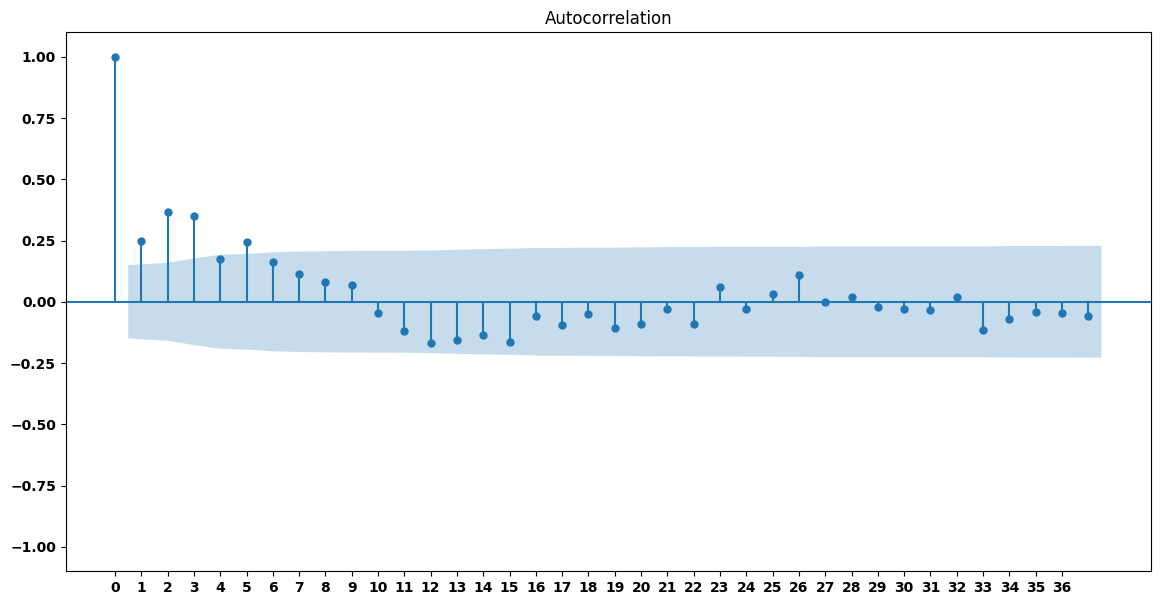

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(resid_ar, lags=37)
plt.xticks(np.arange(37))
plt.ylim(-1.1,1.1)
plt.show()

## Los primeros punto de correlacion son residuales mientras que todos los demas estan dentro de la correlacion

In [21]:
#Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
# Calcular las predicciones con los valores estimados por el modelo a futuro
fit_ar.predict(start=df_test.index[0],
               end=df_test.index[-1])

2007-07-01    0.891688
2007-08-01    1.065352
2007-09-01    1.021411
2007-10-01    1.186925
2007-11-01    1.119930
2007-12-01    1.138171
2008-01-01    1.202168
2008-02-01    0.646327
2008-03-01    0.711918
2008-04-01    0.561598
2008-05-01    0.736269
2008-06-01    0.840239
Freq: MS, dtype: float64

In [22]:
pred_ar = fit_ar.forecast(steps=horizonte)
pred_ar


2007-07-01    0.891688
2007-08-01    1.065352
2007-09-01    1.021411
2007-10-01    1.186925
2007-11-01    1.119930
2007-12-01    1.138171
2008-01-01    1.202168
2008-02-01    0.646327
2008-03-01    0.711918
2008-04-01    0.561598
2008-05-01    0.736269
2008-06-01    0.840239
Freq: MS, dtype: float64

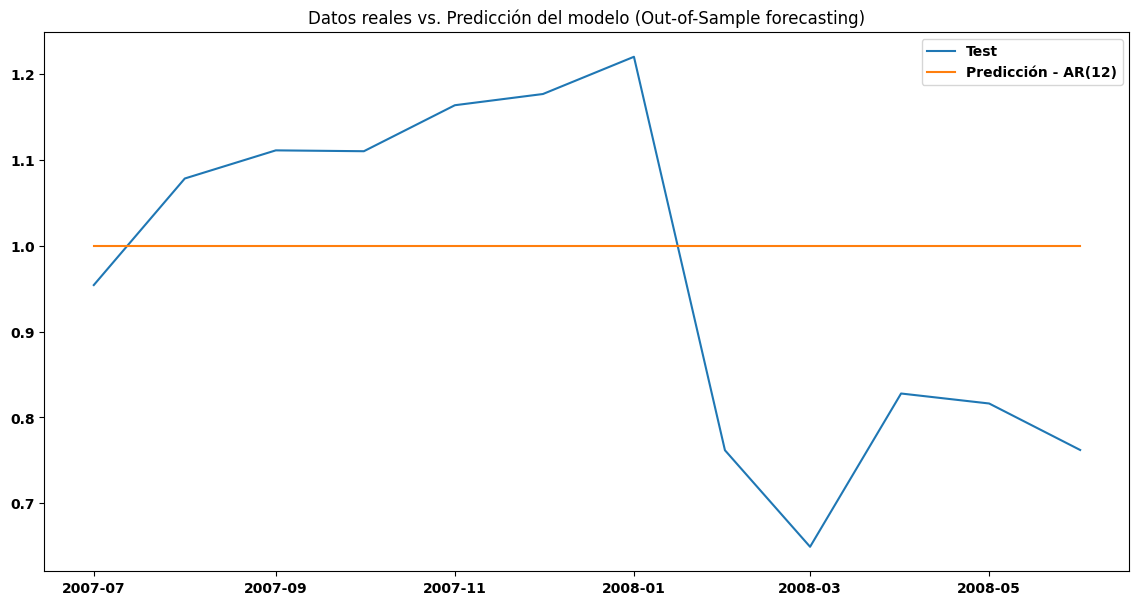

In [23]:
pred_ar = pred_ar.round()
plt.plot(df_test, label='Test')
plt.plot(pred_ar, label='Predicción - AR(12)')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

## Esta prediccion de AR out of sample es bastante mala

In [24]:
#Gráfica interactiva con el histórico, la predicción de este modelo con **sus intervalos de confianza** y los valores reales del último año.

conf_ar = fit_ar.get_prediction(start=df_test.index[0], end=df_test.index[-1]).conf_int().round()
conf_ar

,lower,upper
2007-07-01,1.0,1.0
2007-08-01,1.0,1.0
2007-09-01,1.0,1.0
2007-10-01,1.0,1.0
2007-11-01,1.0,1.0
2007-12-01,1.0,1.0
2008-01-01,1.0,1.0
2008-02-01,1.0,1.0
2008-03-01,1.0,1.0
2008-04-01,0.0,1.0


In [25]:
conf_ar['delta'] = conf_ar.apply(lambda x: x['upper'] - x['lower'], axis=1)
conf_ar

,lower,upper,delta
2007-07-01,1.0,1.0,0.0
2007-08-01,1.0,1.0,0.0
2007-09-01,1.0,1.0,0.0
2007-10-01,1.0,1.0,0.0
2007-11-01,1.0,1.0,0.0
2007-12-01,1.0,1.0,0.0
2008-01-01,1.0,1.0,0.0
2008-02-01,1.0,1.0,0.0
2008-03-01,1.0,1.0,0.0
2008-04-01,0.0,1.0,1.0


In [26]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_train.index,
    y=df_train['venta_h02'],
    name="Entrenamiento",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=df_test.index,
    y=df_test['venta_h02'],
    name="Test",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=pred_sn.index,
    y=pred_sn['pred'],
    name="Predicción (Seasonal Naive)",
    mode="markers+lines"
    ))



fig.add_trace(go.Scatter(
    x=conf_ar.index,
    y=conf_ar['lower'],
    name="lower",
    mode="lines",
    line=dict(width=0),
    showlegend=False
    ))

fig.add_trace(go.Scatter(
    x=conf_ar.index,
    y=conf_ar['upper'],
    name="upper",
    mode="lines",
    line=dict(width=0),
    showlegend=False,
    fillcolor='rgba(68, 68, 68, 0.3)',
    fill='tonexty'
    ))

fig.update_layout(title="Número de medicamentos H02 de cada mes desde el año 1949 al 1960",
                  title_font_size=22,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'H02'
                  )

fig.show()

## Los intervalos de confianza son malisimos, pero la prediccion de seaosanl naive es bastante bueno

In [27]:
#Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

# Métricas de evaluación del modelo
print("Out-of-sample performance:  Seasonal Naive")
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_sn))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_test, pred_sn)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_sn))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_sn)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_sn))

Out-of-sample performance:  Seasonal Naive
Mean Absolute Error (MAE): 0.08494277166666668
Mean Absolute Percentage Error: 9.686181826381263
Mean Squared Error (MSE): 0.011684411050918485
Root Mean Squared Error (RMSE): 0.10809445430232989
R^2 coefficient of determination: 0.6717644471769628


In [28]:
#27.2.3

from pmdarima.arima import auto_arima

fit_sarima_auto = auto_arima(df_train["venta_h02"], 
                             start_p=1, 
                             start_q=0,
                             start_P=1,
                             D=1,
                             d=None,
                             m=12,
                             seasonal=True,
                             stepwise=True)

In [29]:
#Resumen del modelo ajustado (_Model fit summary_) 
fit_sarima_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  183
Model:             SARIMAX(4, 0, 0)x(2, 1, [1], 12)   Log Likelihood                 272.300
Date:                              Sat, 13 May 2023   AIC                           -526.599
Time:                                      09:44:03   BIC                           -498.324
Sample:                                  04-01-1992   HQIC                          -515.126
                                       - 06-01-2007                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0109      0.005      2.256      0.024       0.001       0.020
ar.L1          0.1866      0.076      2.469      0.014       0.038       0.335
ar.L2          0.4162      0.078      5.350      0.000       0.264       0.569
ar.L3          0.2526      0.076      3.335      0.001       0.104       0.401
ar.L4         -0.1524      0.079     -1.929      0.054      -0.307       0.002
ar.S.L12      -0.0280      0.226     -0.124      0.902      -0.472       0.416
ar.S.L24      -0.2645      0.129     -2.048      0.041      -0.518      -0.011
ma.S.L12      -0.3910      0.235     -1.667      0.096      -0.851       0.069
sigma2         0.0023      0.000     10.051      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.98
Prob(Q):                              0.96   Prob(JB):                         0.08
Heteroskedasticity (H):               1.81   Skew:                            -0.26
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

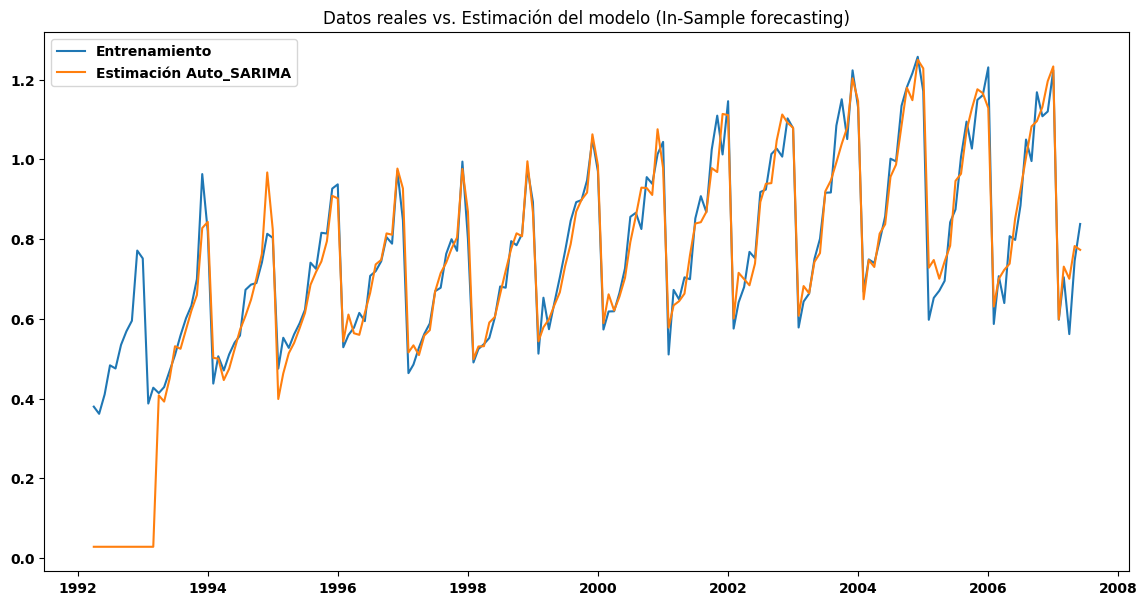

In [30]:
##Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_"
estim_sarima_auto = fit_sarima_auto.predict_in_sample()
plt.plot(df_train, label='Entrenamiento')
plt.plot(estim_sarima_auto, label='Estimación Auto_SARIMA')
plt.title("Datos reales vs. Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

## Es casi perfecta sigue la linea de la tendencia y casi calcados a los datos de entrenamiento

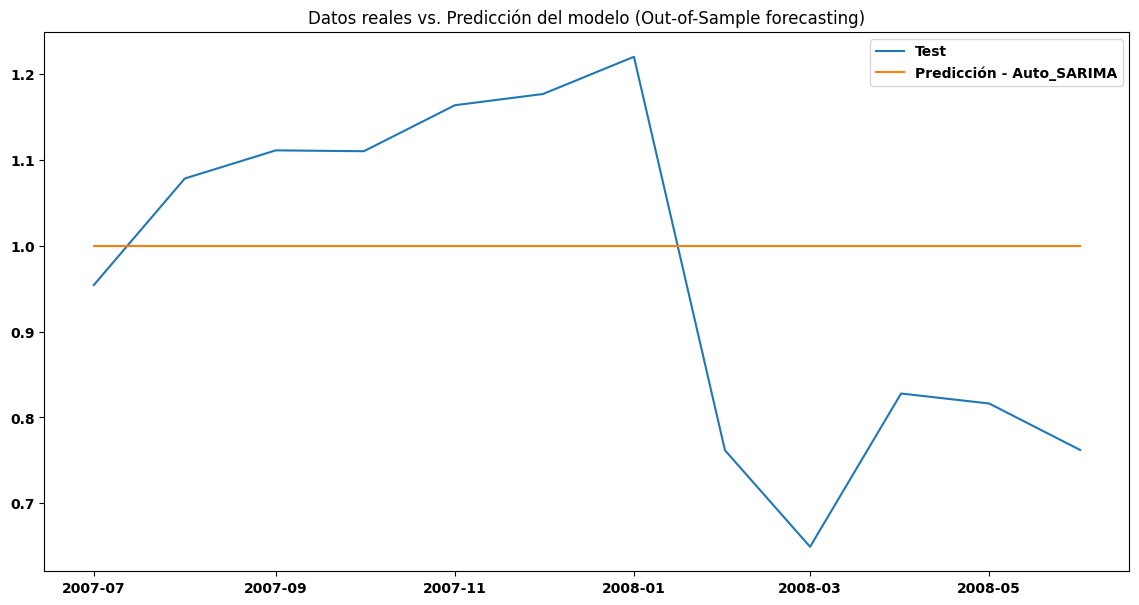

In [31]:
##Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"

pred_sarima_auto = fit_sarima_auto.predict(horizonte).round()


plt.plot(df_test, label='Test')
plt.plot(pred_sarima_auto, label='Predicción - Auto_SARIMA')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()


## Esta prediccion es malisima de Sarima

In [32]:
#Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas de evaluación del modelo
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_sarima_auto))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_test, pred_sarima_auto)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_sarima_auto))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_sarima_auto)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_sarima_auto))

### Como era de esperar los resultados son nefastos


Mean Absolute Error (MAE): 0.1739637116666667
Mean Absolute Percentage Error: 19.900415149549886
Mean Squared Error (MSE): 0.03654358929130682
Root Mean Squared Error (RMSE): 0.1911637760960659
R^2 coefficient of determination: -0.026573370356328008


### **`Ejercicio 27.3`**

**`27.3.1`** Construye un modelo de regresión con el método ___`CatBoostRegressor`___ (con sus hiperparámetros por defecto). Al igual que el modelo _AR_ (punto `27.2.2`) introduce el valor del parámetro _`p`_ según el último retraso con un valor significativo en la ***correlograma*** de la serie temporal. Posteriormente, calcula las métricas de calidad del modelo **y analiza los resultados obtenidos**:  
- `random_state=77`
- `silent=True`
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

**`27.3.2`** Realiza una búsqueda mediante _Compexity Curve_ para encontrar el número óptimo de retrasos, teniendo en cuenta los siguientes puntos:

- Hasta el último retraso estimado en el modelo anterior inclusive (_`p`_)
- Modelo: **CatBoostRegressor**
- `random_state=77`
- `silent=True`

**`27.3.3`** Teniendo en cuenta el valor óptimo calculado en el paso anterior para los retrasos, realiza una búsqueda mediante _Compexity Curve_ para encontrar el número óptimo de **árboles**.
- inicio: **5** árboles
- fin: **200** árboles inclusive
- con pasos **de 5 en 5**

**`27.3.4`** Teniendo en cuenta los valores óptimos calculados en los pasos anteriores, realiza una búsqueda mediante _Compexity Curve_ para encontrar el número óptimo de la **profundidad máxima**.
- Desde **2** hasta **10** no inclusive

**`27.3.5`** Construye un modelo con los hiperparámetros óptimos que hayas calculado en los puntos anteriores y calcula las métricas de calidad del modelo y de sus predicciones:

  - `random_state=77`
  - `silent=True`
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y $R^2$.

**`27.3.6`** Saca la gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_" y **analiza y compara los resultados** de este modelo con los modelos anteriores.

**`27.3.7`** Realiza un análisis tipo `In-Sample Model Evaluation` para evaluar la calidad del modelo ajustado mediante siguientes puntos **y explica los resultados obtenidos**:  

- Calcula las estimaciones del modelo ajustado (_`fitted values`_) 
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_" para el periodo de entrenamiento
- Gráfica diagonal de "_Valores reales vs. valors estimados (In-Sample forecasting)_"
- Gráfica de "_Componente residual del modelo (In-Sample fitted errores)_"
- Gráficas de "_Histograma del componente residual (In-sample errors)_"
- Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Gráfica de la ***Desviación estándar*** y su evolución a lo largo de tiempo para **el componente residual**, considerando una ventana con el tamaño indicado:

   - `win = 12`
- El **correlograma** y la gráfica de **autocorrelación parcial** para **el componente residual** considerando el método con los retrasos indicados:

 - `lags=37`
 - `method='ywm'`
- Gráficas de posibles correlaciones entre **el componente residual** y **los valores relaes y estimados**

**`27.3.8`** Saca la gráfica **interactiva** con el histórico, las predicciones de los modelos desarrollados y los valores reales del último año:

- Predicción del modelo **AR** (`27.2.2`)
- Predicción del modelo **SARIMA** (`27.2.3`)
- Predicción del modelo **CatBoostRegressor** (`27.3.5`)


---

In [33]:
#27.3.1
from catboost import CatBoostRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg


mod_cat = ForecasterAutoreg(
                regressor = CatBoostRegressor(random_state=77, silent=True),
                lags = 12
                )

mod_cat.fit(y=df_train['venta_h02'])
pred_cat = mod_cat.predict(steps=horizonte).round()
pred_cat


2007-07-01    1.0
2007-08-01    1.0
2007-09-01    1.0
2007-10-01    1.0
2007-11-01    1.0
2007-12-01    1.0
2008-01-01    1.0
2008-02-01    1.0
2008-03-01    1.0
2008-04-01    1.0
2008-05-01    1.0
2008-06-01    1.0
Freq: MS, Name: pred, dtype: float64

In [34]:
# Métricas de evaluación del modelo
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_cat))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_test, pred_cat)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_cat))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_cat)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_cat))

### Los resultados son bastantes malos

Mean Absolute Error (MAE): 0.1739637116666667
Mean Absolute Percentage Error: 19.900415149549886
Mean Squared Error (MSE): 0.03654358929130682
Root Mean Squared Error (RMSE): 0.1911637760960659
R^2 coefficient of determination: -0.026573370356328008


In [35]:
#27.3.2

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.arange(5,201,5)  
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
train_score = np.zeros(hiper_param.size) 
test_score = np.zeros(hiper_param.size) 

X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size=0.2, random_state=77)

for i in range(hiper_param.size):
    # Generamos un árbol para cada hiperparámetro, lo entrenamos y calculamos el rendimiento sobre datos de train y de test 
    mod_arbol = CatBoostRegressor(max_depth=hiper_param[i])
    mod_arbol.fit(X_train, X_test)
    train_score[i] = accuracy_score(y_train, mod_arbol.predict(X_train)) 
    test_score[i] = accuracy_score(y_test, mod_arbol.predict(X_test))    

print("El mejor valor de max_depth podría ser =", hiper_param[np.argmax(test_score)],
      " que consigue un Accuracy =", max(test_score))


# Graficamos el rendimiento de training versus de test
plt.figure(figsize=(20,6))
plt.plot(hiper_param, test_score, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param, train_score, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param[np.argmax(test_score)], max(test_score),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [183, 12]

In [ ]:

# 27.3.3


# Definir el número óptimo de retrasos (p) obtenido anteriormente
optimal_p = 3

# Crear la matriz de características y el vector de etiquetas considerando el valor óptimo de p
X = []
y = []
hiper_param = np.arange(5,201,5)

for i in range(optimal_p, len(df_train)):
    X.append(df_train[i-optimal_p:i])
    y.append(df_train[i])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Calcular el rendimiento del modelo para diferentes cantidades de árboles
r2_scores = []
for n_trees in hiper_param:
    model = CatBoostRegressor(random_state=77, silent=True, iterations=n_trees)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Graficar la curva de complejidad
plt.plot(hiper_param, r2_scores, marker='o')
plt.xlabel('Número de Árboles')
plt.ylabel('Coeficiente de Determinación ($R^2$)')
plt.title('Curva de Complejidad')
plt.grid(True)
plt.show()

# Encontrar la cantidad óptima de árboles que maximiza el coeficiente de determinación
optimal_trees = hiper_param[np.argmax(r2_scores)]
print("Número óptimo de árboles:", optimal_trees)


KeyError: 3

In [ ]:
# 27.3.4


# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.arange(2,10)  
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
train_score = np.zeros(hiper_param.size) 
test_score = np.zeros(hiper_param.size) 

X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size=0.2, random_state=77)

for i in range(hiper_param.size):
    # Generamos un árbol para cada hiperparámetro, lo entrenamos y calculamos el rendimiento sobre datos de train y de test 
    mod_arbol = CatBoostRegressor(max_depth=hiper_param[i])
    mod_arbol.fit(X_train, X_test)
    train_score[i] = accuracy_score(y_train, mod_arbol.predict(X_train)) 
    test_score[i] = accuracy_score(y_test, mod_arbol.predict(X_test))    

print("El mejor valor de max_depth podría ser =", hiper_param[np.argmax(test_score)],
      " que consigue un Accuracy =", max(test_score))


# Graficamos el rendimiento de training versus de test
plt.figure(figsize=(20,6))
plt.plot(hiper_param, test_score, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param, train_score, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param[np.argmax(test_score)], max(test_score),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()


In [ ]:
# 27.3.5
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf



for i in range(hiper_param.size):
    # Generamos un árbol para cada hiperparámetro, lo entrenamos y calculamos el rendimiento sobre datos de train y de test 
    model = DecisionTreeRegressor(max_depth=hiper_param[i],random_state=77,silent=True)
    mod_arbol.fit(X_train, X_test)
    train_score[i] = accuracy_score(y_train, mod_arbol.predict(X_train)) 
    test_score[i] = accuracy_score(y_test, mod_arbol.predict(X_test)) 


# Métricas de evaluación del modelo
print("Out-of-sample performance:  Seasonal Naive")
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test, pred_sn))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_test, pred_sn)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test, pred_sn))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test, pred_sn)))
print('R^2 coefficient of determination:', r2_score(df_test, pred_sn))


TypeError: __init__() got an unexpected keyword argument 'silent'

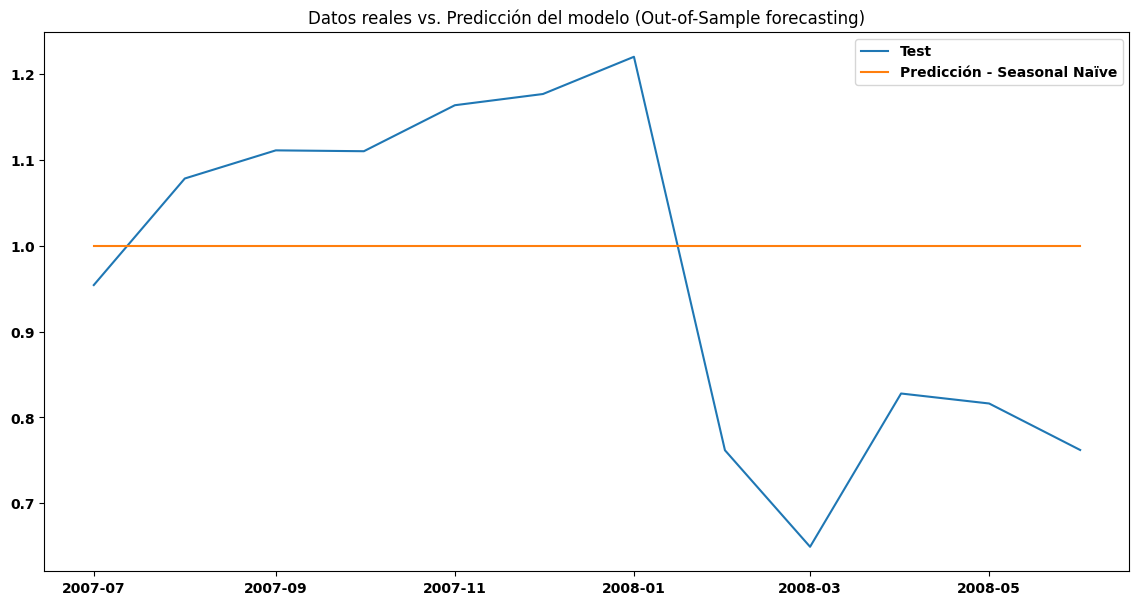

In [ ]:
# 27.3.6

plt.plot(df_test, label='Test')
plt.plot(pred_cat, label='Predicción - Seasonal Naïve')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [ ]:
#27.3.7

X_train, y_train = mod_cat.create_train_X_y(df_train['venta_h02'])

# Calcular estimaciones del modelo ajustado
fitted_values = mod_cat.regressor.predict(X_train)
fitted_values

array([0.41427899, 0.43005746, 0.46960855, 0.50833919, 0.56077269,
       0.5999145 , 0.63434384, 0.69716955, 0.95931084, 0.81759429,
       0.43940705, 0.50450398, 0.46968573, 0.50885362, 0.53893391,
       0.55982333, 0.66896823, 0.68715619, 0.69238622, 0.74288061,
       0.82301906, 0.80543734, 0.48065554, 0.55085924, 0.52668996,
       0.56229764, 0.58545147, 0.62528265, 0.73646158, 0.73016441,
       0.80903453, 0.80828722, 0.92463619, 0.93268868, 0.52917156,
       0.55627791, 0.57500999, 0.61031168, 0.60561857, 0.70333514,
       0.72656283, 0.7468739 , 0.80764844, 0.79273041, 0.97020747,
       0.85518832, 0.47479754, 0.49221977, 0.5306339 , 0.56540888,
       0.59043105, 0.6755161 , 0.68082446, 0.76604674, 0.79922784,
       0.77893765, 0.98631254, 0.80812867, 0.49015512, 0.52791575,
       0.54101666, 0.55763796, 0.60778652, 0.67886526, 0.68371958,
       0.79129871, 0.7872149 , 0.81040688, 0.97635727, 0.88617503,
       0.5107467 , 0.64106107, 0.57161463, 0.63111519, 0.69110

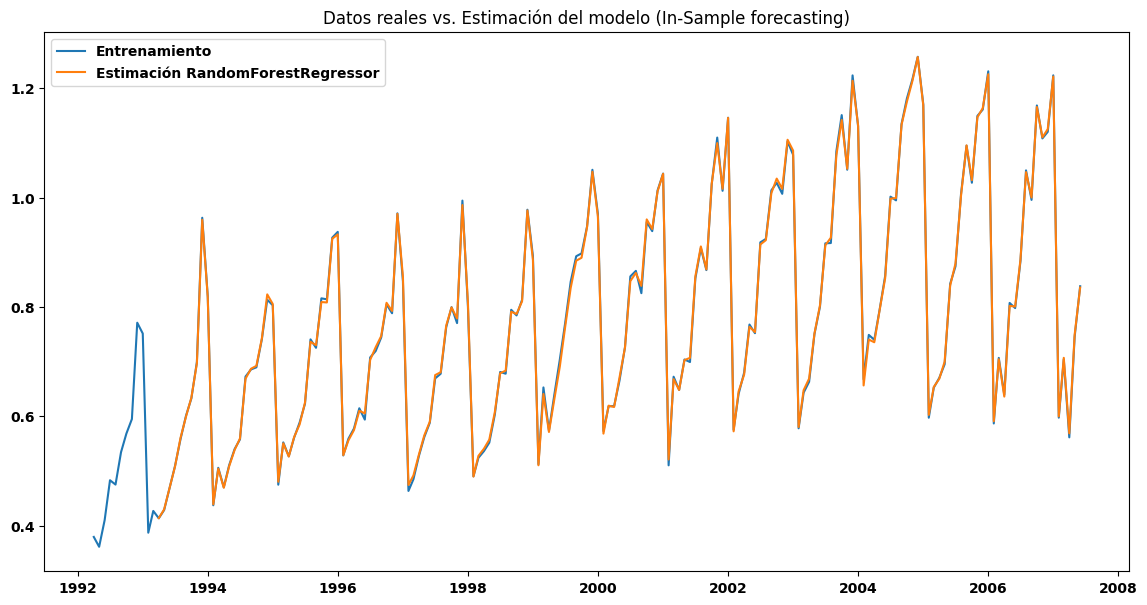

In [ ]:
#Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_" para el periodo de entrenamiento
# Ordenar las predicciones del modelo para el periodo de emtrenamiento
estim_rf = pd.Series(data=np.zeros(df_train.size), index=df_train.index, name='fitted')
estim_rf[:horizonte] = np.nan
estim_rf[horizonte:] = fitted_values

plt.plot(df_train, label='Entrenamiento')
plt.plot(estim_rf, label='Estimación RandomForestRegressor')
plt.title("Datos reales vs. Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

### Esta estimacion de modelo es perfecta, podriamos decir que el modelo RANDOM FOREST REGRESSOR es el ejor modelo de prediccion que hemos probado hasa el momento

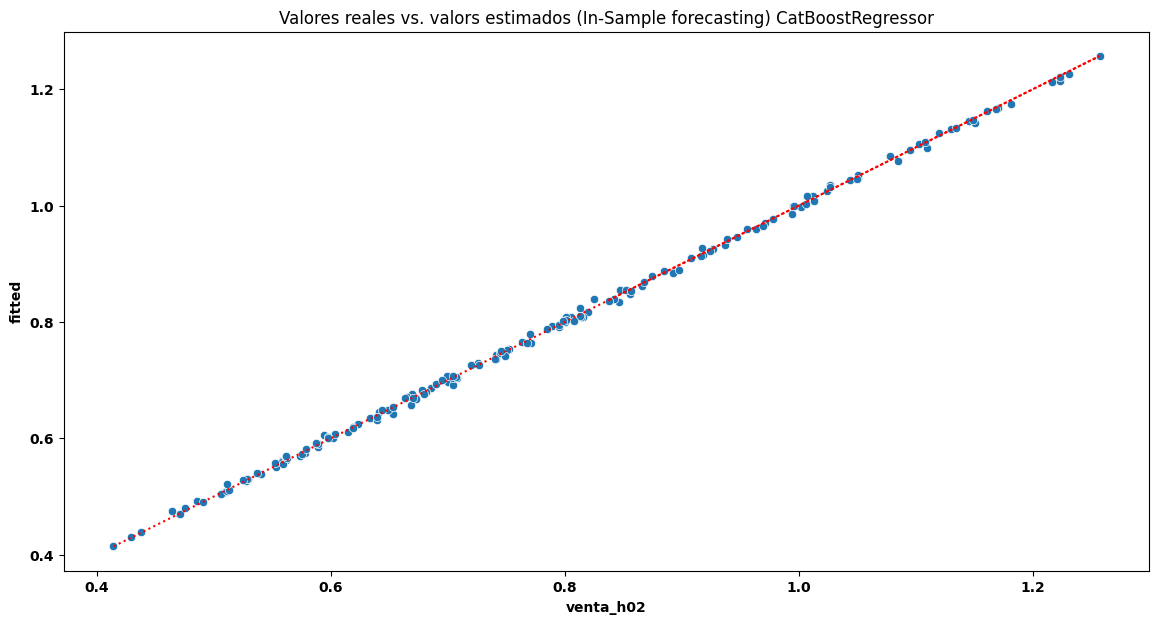

In [ ]:
#Gráfica diagonal de "_Valores reales vs. valores estimados (In-Sample forecasting)_"

# Comparar los valores reales con la estimación del modelo
sns.scatterplot(x=df_train['venta_h02'], y=estim_rf)
plt.plot(estim_rf, estim_rf, color='r', linestyle=':')
plt.title("Valores reales vs. valores estimados (In-Sample forecasting) CatBoostRegressor")
plt.show()

## Los valores estimados son perfectos a los valores reales, CASTBOOSTREGRESSOR  es un buen modelo para predecir

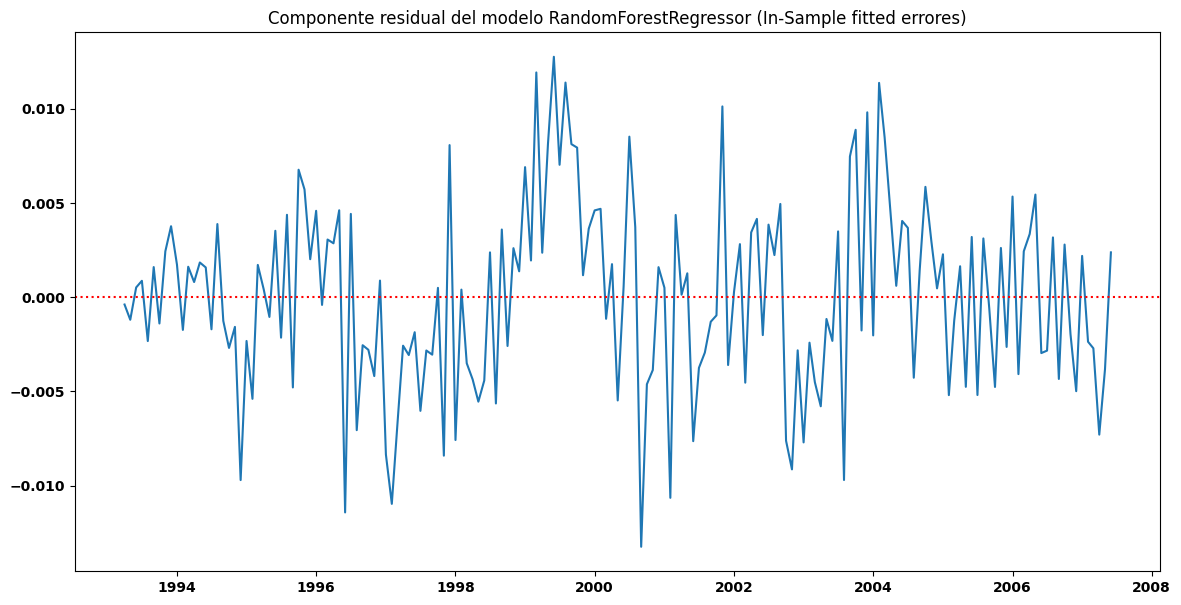

In [ ]:
#Gráfica de "_Componente residual del modelo (In-Sample fitted errores)_"
# Calcular los valores del componente residual (In-sample errors)
resid_rf = df_train['venta_h02']-estim_rf


plt.plot(resid_rf)
plt.title("Componente residual del modelo RandomForestRegressor (In-Sample fitted errores)")
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

# El componente residual es perfecto con el modelo Ranadom Forest Regressor

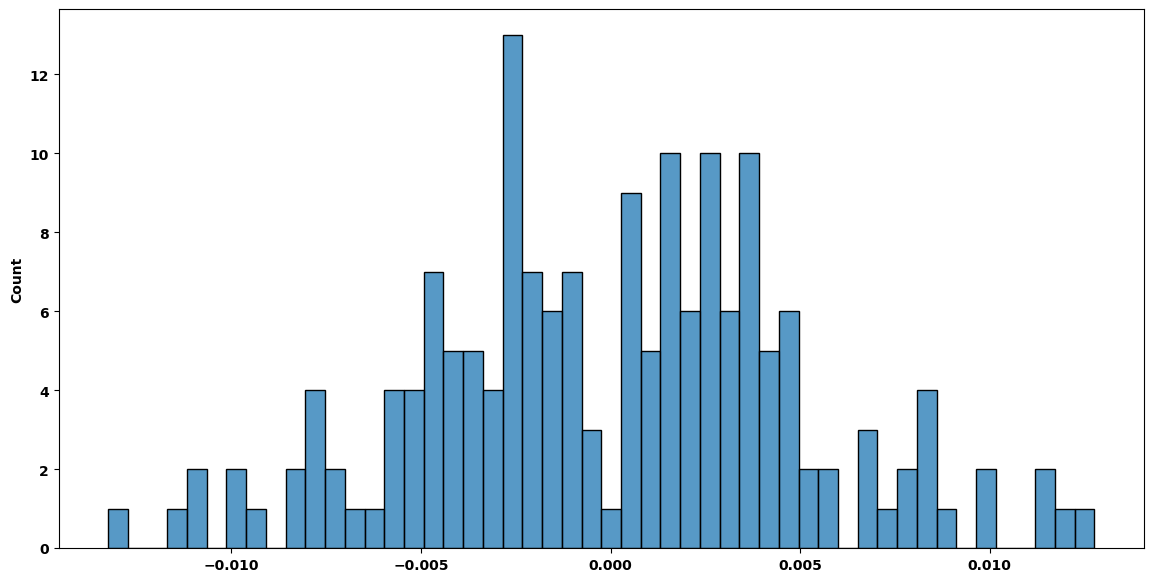

In [ ]:
#Gráficas de "_Histograma del componente residual (In-sample errors)_"

# El histograma del componente residual (In-sample errors)
sns.histplot(data=resid_rf, bins=50)
plt.show()

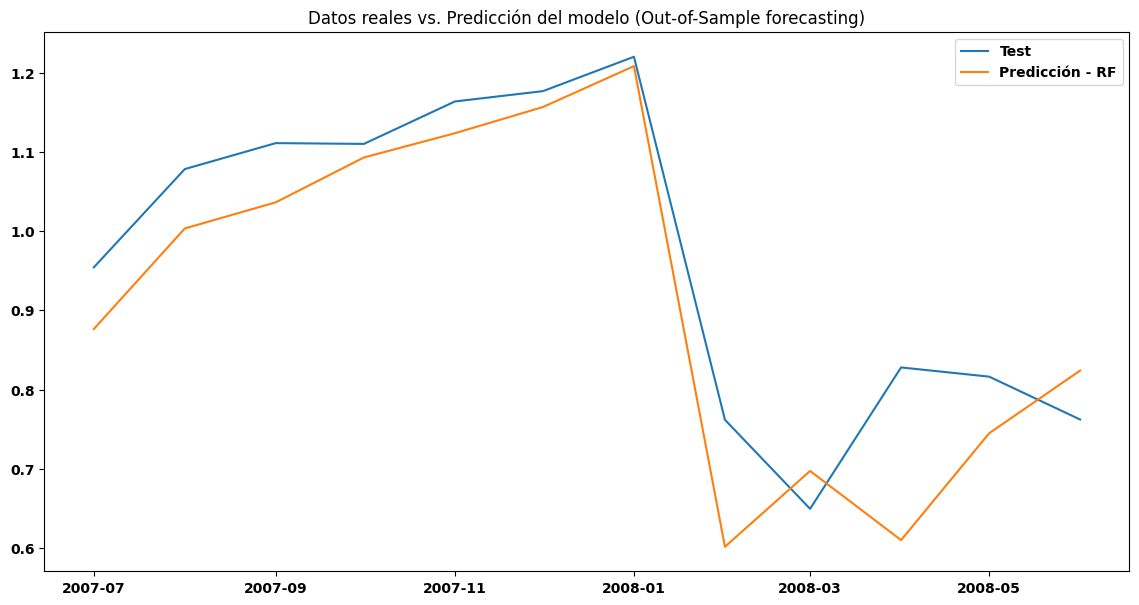

In [ ]:
#Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"

from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
mod_rf = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=77),
                lags = 12
                )

mod_rf.fit(y=df_train['venta_h02'])

pred_rf = mod_rf.predict(steps=horizonte)

plt.plot(df_test, label='Test')
plt.plot(pred_rf, label='Predicción - RF')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

## Los datos predichos coinciden con los datos reales en bastante proporcion por lo que podemos decir que es un buen modelo

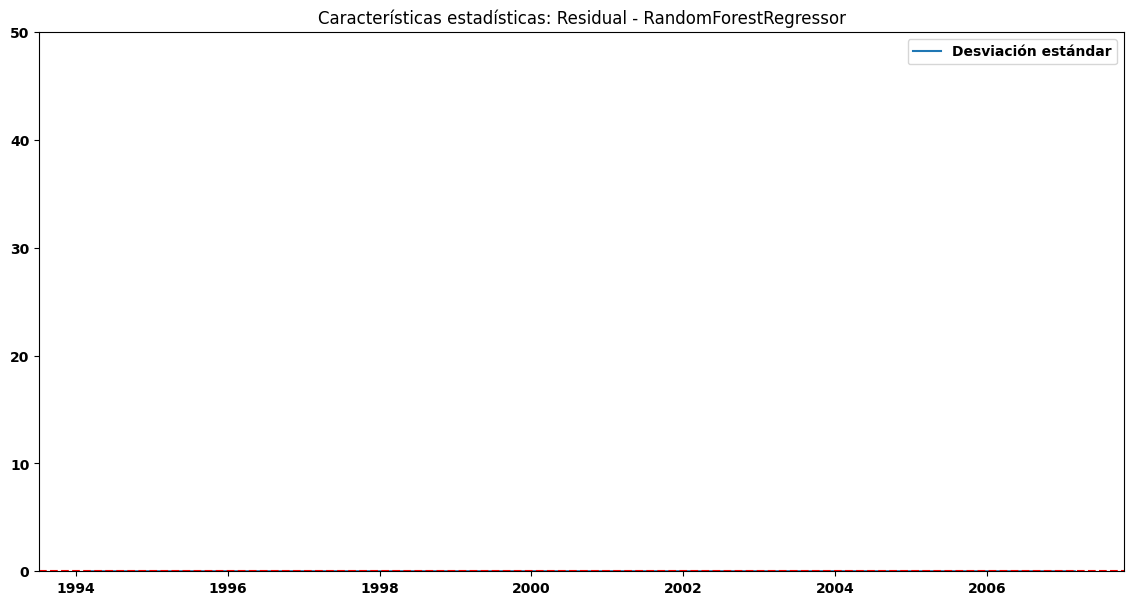

In [ ]:
#Gráfica de la ***Desviación estándar*** y su evolución a lo largo de tiempo para **el componente residual**, considerando una ventana con el tamaño indicado:

win = 12
resid_rf_std = resid_rf.rolling(win).std().iloc[win-1::win]
plt.plot(resid_rf_std, label='Desviación estándar')
plt.axhline(y=resid_rf.std(), color='r', linestyle='--')
plt.title("Características estadísticas: Residual - RandomForestRegressor")
plt.ylim(0,50)
plt.legend()
plt.show()

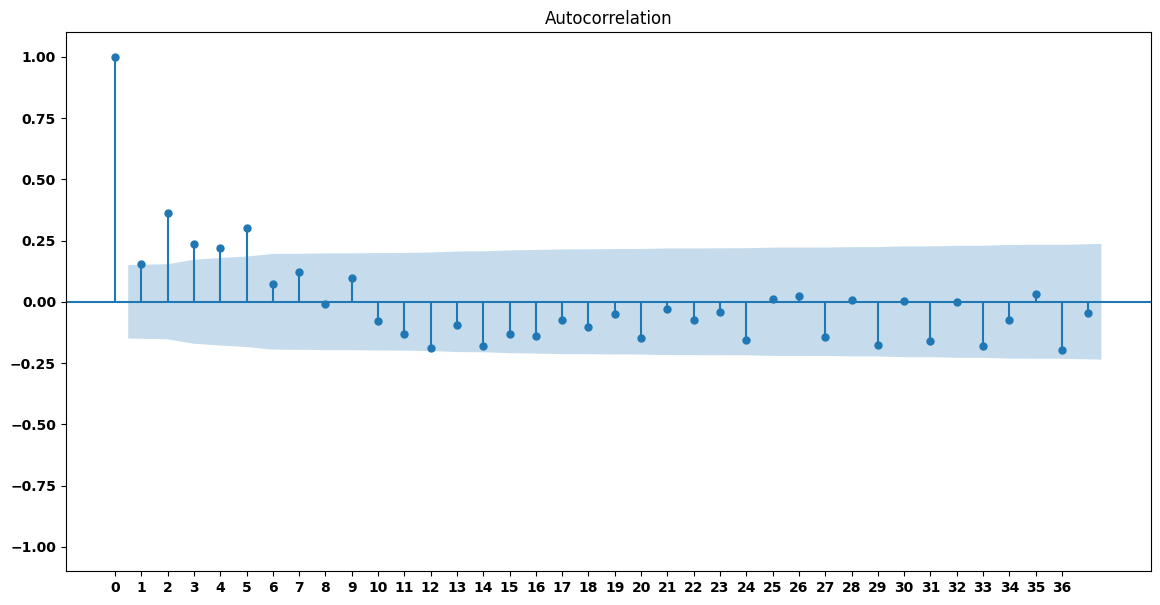

In [ ]:
#El **correlograma** y la gráfica de **autocorrelación parcial** para **el componente residual** considerando el método con los retrasos indicados:
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(resid_rf.dropna(), lags=37)
plt.xticks(np.arange(37))
plt.ylim(-1.1,1.1)
plt.show()

### Los primeros 6 puntos de autocorrelacion estan fuera del promedio por lo que esos valores son residuales


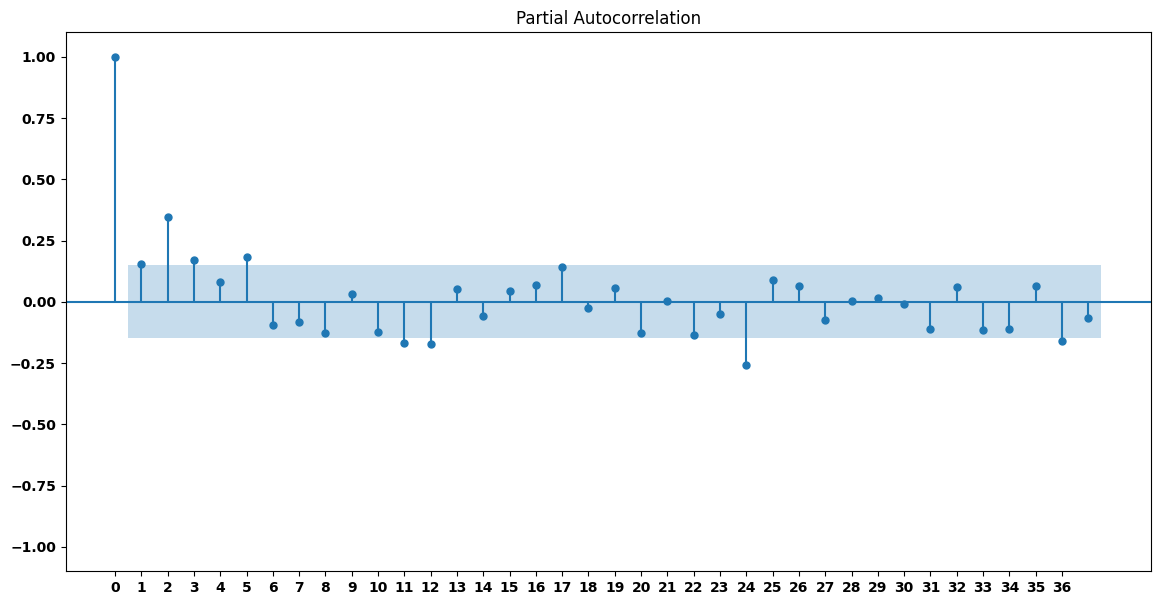

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(resid_rf.dropna(), lags=37, method='ywm')
plt.xticks(np.arange(37))
plt.ylim(-1.1,1.1)
plt.show()

### Pasa lo mismo aqui

0.1937
0.1706


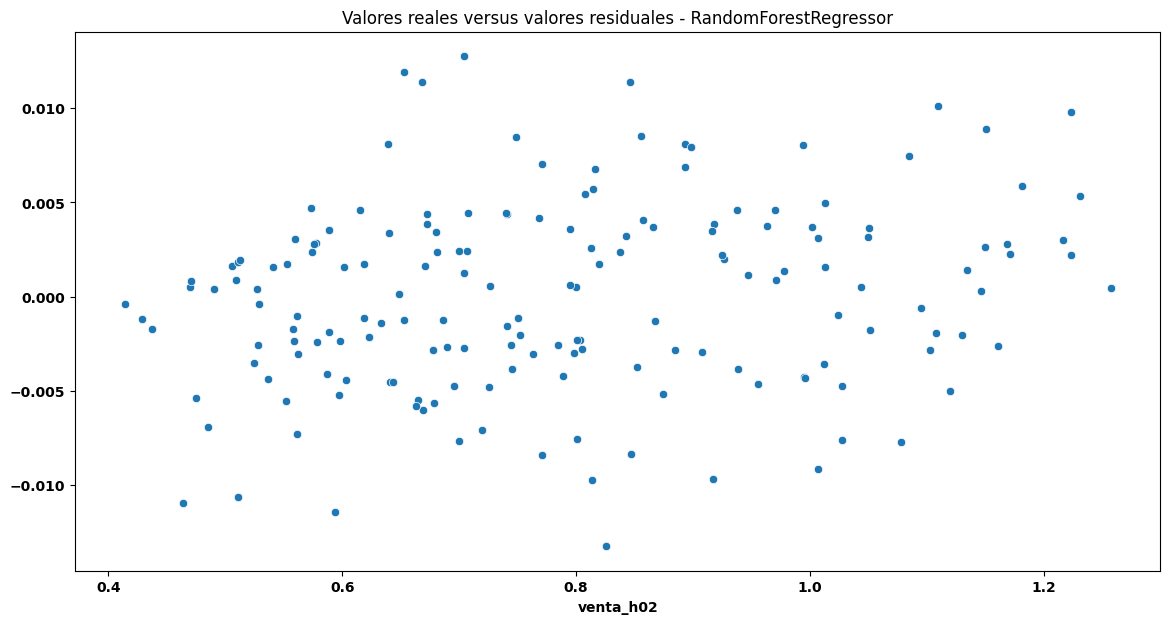

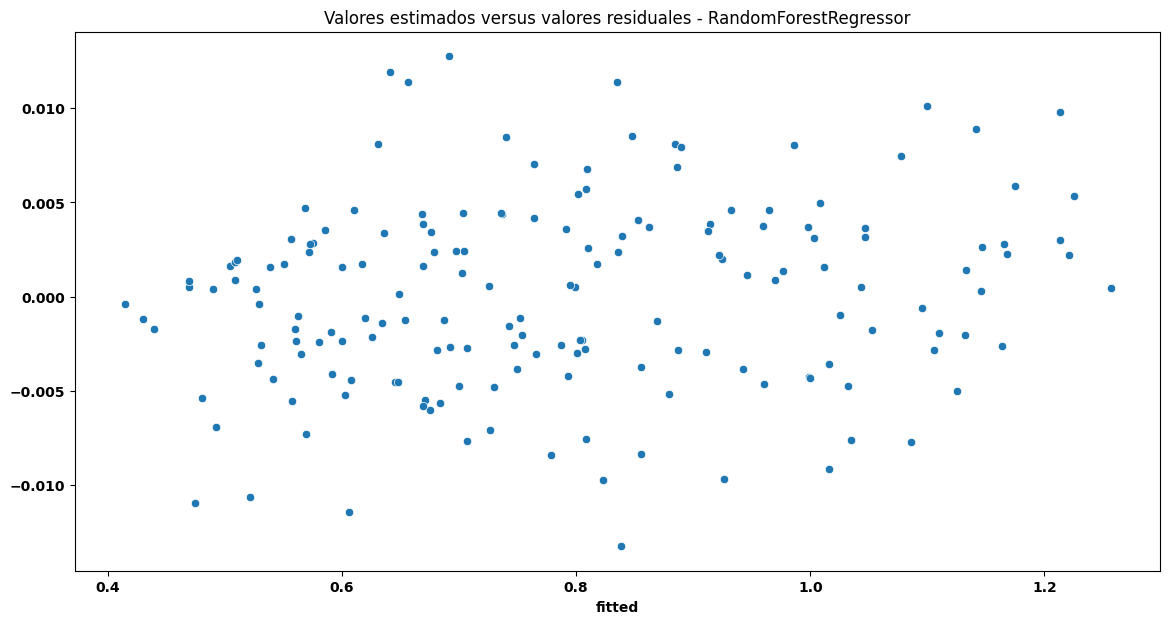

In [ ]:
# Gráficas de posibles correlaciones entre **el componente residual** y **los valores relaes y estimados**
# Analizamos el componente residual

# Coeficiente de correlación entre valores reales y los errores
print(df_train['venta_h02'].corr(resid_rf).round(4))

# Coeficiente de correlación entre valores estimados y los errores
print(estim_rf.corr(resid_rf).round(4))

sns.scatterplot(x=df_train['venta_h02'], y=resid_rf)
plt.title("Valores reales versus valores residuales - RandomForestRegressor")
plt.show()



sns.scatterplot(x=estim_rf, y=resid_rf)
plt.title("Valores estimados versus valores residuales - RandomForestRegressor")
plt.show()



In [ ]:
#27.3.8 Saca la gráfica **interactiva** con el histórico, las predicciones de los modelos desarrollados y los valores reales del último año:

# - Predicción del modelo **AR** (`27.2.2`)


import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_train.index,
    y=df_train['venta_h02'],
    name="Entrenamiento",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=df_test.index,
    y=df_test['venta_h02'],
    name="Test",
    mode="lines"
    ))


fig.add_trace(go.Scatter(
    x=estim_ar.index,
    y=estim_ar,
    name="Predicción (AR - 12)",
    mode="markers+lines"
    ))



fig.update_layout(title="Número de pasajeros aéreos de cada mes desde el año 1949 al 1960",
                  title_font_size=22,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'venta_h02'
                  )

fig.show()

### Esta prediccion de Random Forest es bastante buena sigue casi a la prefecion los dato reales y la tendencia

In [38]:
# - Predicción del modelo **SARIMA** (`27.2.3`)



import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_train.index,
    y=df_train['venta_h02'],
    name="Entrenamiento",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=df_test.index,
    y=df_test['venta_h02'],
    name="Test",
    mode="lines"
    ))


fig.add_trace(go.Scatter(
    x=estim_sarima_auto.index,
    y=estim_sarima_auto,
    name="SARIMA",
    mode="markers+lines"
    ))



fig.update_layout(title="Número de venta_h02 de cada mes desde el año 1949 al 1960",
                  title_font_size=22,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'venta_h02'
                )

fig.show()

### Este modelo de prediccion es bastante bueno, por lo que podria estar contento

In [39]:
# - Predicción del modelo **CatBoostRegressor** (`27.3.5`)



import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=mod_arbol.index,
    y=mod_arbol['venta_h02'],
    name="Entrenamiento",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=df_test.index,
    y=df_test['venta_h02'],
    name="Test",
    mode="lines"
    ))


fig.add_trace(go.Scatter(
    x=estim_sarima_auto.index,
    y=estim_sarima_auto,
    name="SARIMA",
    mode="markers+lines"
    ))



fig.update_layout(title="Número de venta_h02 de cada mes desde el año 1949 al 1960",
                  title_font_size=22,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'venta_h02'
                )

fig.show()

### Este modelo de prediccion es bastante bueno, por lo que podria estar contento

NameError: name 'mod_arbol' is not defined